# Adaptive Derivative Fitting Demo

This demo illustrates how the **adaptive polynomial fitting method** estimates the **first derivative** of a nonlinear function in the presence of noise.

- **Target function:**
  $f(x) = \sin(5x) + 0.5x$
  This function exhibits both rapid oscillations and a linear trend, making it an ideal test case for evaluating the robustness of derivative estimation methods.

- **Evaluation point:**
  $x_0 = 0.4$

- **Noise model:**
  Additive Gaussian noise with standard deviation $\sigma = 0.02$ is injected to simulate uncertainty in function values.

- **Fitting method:**
  We use the `AdaptiveFitDerivative` approach to fit a local polynomial to noisy samples around $x_0$. The method:
  - selectively prunes high-residual points to improve robustness,
  - fits a polynomial to the remaining data, and
  - visualizes the result by plotting:
    - points used vs. excluded in the fit,
    - the fitted polynomial curve, and
    - a shaded tolerance band indicating the residual threshold.


In [1]:
import warnings

import numpy as np

from derivkit.plotutils.plot_kit import PlotKit

In [2]:
# Suppressing warnings to keep notebook output clean for version control (e.g., Git).
# Comment out the line below if you want to see the warnings for debugging.
warnings.filterwarnings('ignore')


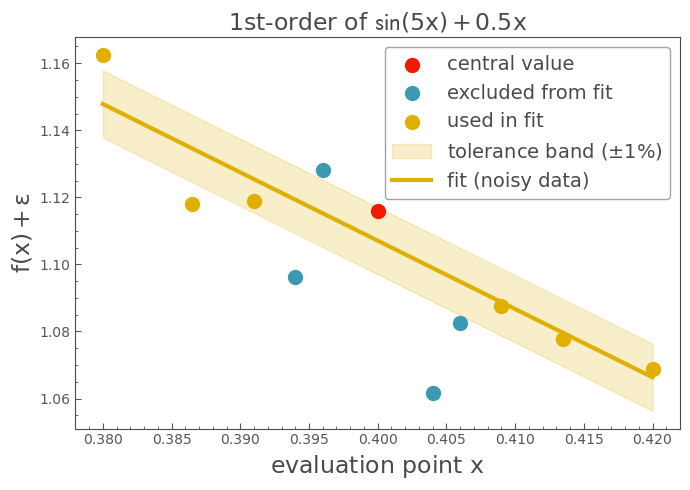

In [3]:
# Define the target function: a combination of oscillatory and linear behavior
demo_func = lambda x: np.sin(5 * x) + 0.5 * x  # nonlinear + mild slope

# Set the evaluation point at which the derivative will be computed
demo_x0 = 0.4

# Define the derivative order to compute
derivative_order = 1

# Directory to save plots
plot_dir = "plots/"

# Title for the plot (used in display and saved file)
demo_title = f"1st-order of $\\sin(5x) + 0.5 x$"

# Initialize the plotting utility with the target function and parameters
demo_plotter = PlotKit(
    function=demo_func,
    central_value=demo_x0,
    derivative_order=derivative_order,  # compute the first derivative
    fit_tolerance=0.01,  # relative residual tolerance for adaptive fitting
    plot_dir=plot_dir   # where to save the resulting figure
)

# Generate and display a diagnostic plot of the adaptive polynomial fit
demo_plotter.adaptive_fit_demo(
    derivative_order=derivative_order,
    noise_std=0.02,  # simulate measurement noise on f(x)
    title=demo_title,  # plot title
    extra_info="demo_func"  # tag for output filenames
)


**Note on the shaded region and point inclusion:**
The shaded band in the plot shows the **tolerance threshold** used during adaptive polynomial fitting.
Its purpose is purely **illustrative**: it visualizes the region within which the fitted polynomial deviates from the noisy data by no more than the specified relative residual (e.g., 1%).

However, **point inclusion in the fit is not based on proximity to the band**, but on a comparison between the relative residual at each point and the specified threshold:

$\left| \frac{f(x_i) - p(x_i)}{f(x_i)} \right| < \text{tolerance}$

Therefore:

- Points **inside** the shaded band can still be **excluded** if their relative residual is large due to small $ f(x_i) $.
- Points **outside** the band can still be **included** if their relative residual is small.

This behavior is expected and highlights the importance of using **relative residuals** rather than absolute differences, especially when $ f(x) $ varies significantly in amplitude.
The fit procedure prioritizes **robustness to local noise** and **stability of the derivative**, not strict adherence to a visual envelope.
